# Korrelationen - einzelne Jahre mit diesem Notebook berechnet

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Aktuelle Pfade
file_paths = [
     "data/rad_2022_tage_19_06_23_r.csv",
#     "data/rad_2021_tage_19_06_23_r.csv",
#     "data/rad_2020_tage_19_06_23_r.csv",
#     "data/rad_2019_tage_19_06_23_r.csv",
#     "data/rad_2018_tage_19_06_23_r.csv",
#     "data/rad_2017_tage_19_06_23_r.csv",
#     "data/rad_2016_tage_19_06_23_r.csv",
#     "data/rad_2015_tage_19_06_23_r.csv",
#     "data/rad_2014_tage_19_06_23_r.csv",
#     "data/rad_2013_tage_19_06_23_r.csv",
#     "data/rad_2012_tage_19_06_23_r.csv",
#     "data/rad_2011_tage_19_06_23_r.csv",
#     "data/rad_2010_tage_19_06_23_r.csv",
#     "data/rad_2009_tage_19_06_23_r.csv",
#     "data/rad_2008_tage_19_06_23_r.csv"
]

# Ein großes Dataframe (df) aus allen Dateien erstellen

In [4]:
df_list = []

for file_path in file_paths:
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)

# Einzelne DataFrames zu einem Gesamt-DataFrame zusammenführen
df = pd.concat(df_list, ignore_index=True)

In [5]:
# Ersten 5 Zeilen anzeigen
df.head()

,datum,zaehlstelle,uhrzeit_start,uhrzeit_ende,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden,kommentar
0,2022-01-01,Arnulf,00:00,23:59,444.0,0.0,444.0,3.2,13.4,0.0,68,7.6,NaN
1,2022-01-02,Arnulf,00:00,23:59,476.0,0.0,476.0,1.9,15.8,0.0,80,4.7,NaN
2,2022-01-03,Arnulf,00:00,23:59,752.0,0.0,752.0,8.7,11.5,0.7,99,0.0,NaN
3,2022-01-04,Arnulf,00:00,23:59,603.0,0.0,603.0,3.7,16.5,10.3,98,1.0,NaN
4,2022-01-05,Arnulf,00:00,23:59,578.0,0.0,578.0,0.3,3.9,1.2,95,0.4,NaN


In [6]:
# Datentypen ausgeben
df.dtypes

datum             object
zaehlstelle       object
uhrzeit_start     object
uhrzeit_ende      object
richtung_1       float64
richtung_2       float64
gesamt           float64
min.temp         float64
max.temp         float64
niederschlag     float64
bewoelkung         int64
sonnenstunden    float64
kommentar         object
dtype: object

In [7]:
df.describe()

,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
count,2112.000000,2112.000000,2112.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1255.560606,1016.145360,2271.705966,6.833973,16.265479,2.275068,68.553425,6.251507
std,976.989902,1008.058567,1925.919657,6.628966,8.924385,4.901089,29.227243,4.819721
min,6.000000,0.000000,9.000000,-10.200000,-5.600000,0.000000,0.000000,0.000000
25%,530.750000,237.500000,875.750000,1.200000,9.300000,0.000000,53.000000,1.500000
50%,995.000000,670.000000,1616.000000,7.000000,16.000000,0.000000,76.000000,6.000000
75%,1743.000000,1495.500000,3025.500000,12.500000,23.800000,2.300000,93.000000,10.700000
max,5690.000000,5193.000000,10883.000000,19.900000,36.800000,43.100000,100.000000,15.700000


# DataFrame df in 4 Quartal-DataFrames aufteilen: q1, q2, q3, q4

In [24]:
# Konvertiere die Spalte "datum" in ein DateTime-Objekt, falls sie es nicht bereits ist
df['datum'] = pd.to_datetime(df['datum'])

# Erstelle DataFrames für jedes Quartal
q1 = df[(df['datum'] >= '2016-01-01') & (df['datum'] <= '2016-03-31')]
q2 = df[(df['datum'] >= '2016-04-01') & (df['datum'] <= '2016-06-30')]
q3 = df[(df['datum'] >= '2016-07-01') & (df['datum'] <= '2016-09-30')]
q4 = df[(df['datum'] >= '2016-10-01') & (df['datum'] <= '2016-12-31')]

In [25]:
q1 = q1.drop(columns=['uhrzeit_ende'], errors='ignore')
q2 = q2.drop(columns=['uhrzeit_ende'], errors='ignore')
q3 = q3.drop(columns=['uhrzeit_ende'], errors='ignore')
q4 = q4.drop(columns=['uhrzeit_ende'], errors='ignore')


In [30]:
import pandas as pd

# Annahme: df ist dein DataFrame

# Konvertiere die Spalte "datum" in ein DateTime-Objekt, falls sie es nicht bereits ist
df['datum'] = pd.to_datetime(df['datum'], errors='coerce')

# Erstelle DataFrames für jedes Quartal
q1 = df[(df['datum'] >= '2016-01-01') & (df['datum'] <= '2016-03-31')]
q2 = df[(df['datum'] >= '2016-04-01') & (df['datum'] <= '2016-06-30')]
q3 = df[(df['datum'] >= '2016-07-01') & (df['datum'] <= '2016-09-30')]
q4 = df[(df['datum'] >= '2016-10-01') & (df['datum'] <= '2016-12-31')]

# Du kannst dann auf die jeweiligen DataFrames q1, q2, q3, q4 zugreifen

In [32]:
q2.head()

,datum,zaehlstelle,uhrzeit_start,uhrzeit_ende,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden,kommentar


## 'uhrzeit_ende'-Spalte wird gelöscht, weil sonst NaN-Werte vorhanden

In [ ]:
df = df.drop(columns=['uhrzeit_ende'], errors='ignore')
# errors='ignore': nicht vorhandene Spalten werden ignoriert beim Löschen

In [16]:
df = df.drop(columns=['richtung_1'], errors='ignore')

In [17]:
df = df.drop(columns=['richtung_2'], errors='ignore')

In [18]:
df

,datum,zaehlstelle,uhrzeit_start,uhrzeit_ende,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden,kommentar
0,2022-01-01,Arnulf,00:00,23:59,444.0,3.2,13.4,0.0,68,7.6,NaN
1,2022-01-02,Arnulf,00:00,23:59,476.0,1.9,15.8,0.0,80,4.7,NaN
2,2022-01-03,Arnulf,00:00,23:59,752.0,8.7,11.5,0.7,99,0.0,NaN
3,2022-01-04,Arnulf,00:00,23:59,603.0,3.7,16.5,10.3,98,1.0,NaN
4,2022-01-05,Arnulf,00:00,23:59,578.0,0.3,3.9,1.2,95,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2185,2022-12-27,Olympia,00:00,23:59,684.0,1.2,7.0,0.0,64,5.6,NaN
2186,2022-12-28,Olympia,00:00,23:59,821.0,0.6,9.5,0.0,93,3.6,NaN
2187,2022-12-29,Olympia,00:00,23:59,880.0,5.1,13.5,1.2,98,3.4,NaN
2188,2022-12-30,Olympia,00:00,23:59,860.0,4.3,12.7,1.5,76,6.1,NaN


In [65]:
df.dtypes

datum             object
zaehlstelle       object
uhrzeit_start     object
uhrzeit_ende      object
richtung_1       float64
richtung_2       float64
gesamt           float64
min.temp         float64
max.temp         float64
niederschlag     float64
bewoelkung         int64
sonnenstunden    float64
kommentar         object
dtype: object

In [8]:
df.describe()

,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
count,2112.000000,2112.000000,2112.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1255.560606,1016.145360,2271.705966,6.833973,16.265479,2.275068,68.553425,6.251507
std,976.989902,1008.058567,1925.919657,6.628966,8.924385,4.901089,29.227243,4.819721
min,6.000000,0.000000,9.000000,-10.200000,-5.600000,0.000000,0.000000,0.000000
25%,530.750000,237.500000,875.750000,1.200000,9.300000,0.000000,53.000000,1.500000
50%,995.000000,670.000000,1616.000000,7.000000,16.000000,0.000000,76.000000,6.000000
75%,1743.000000,1495.500000,3025.500000,12.500000,23.800000,2.300000,93.000000,10.700000
max,5690.000000,5193.000000,10883.000000,19.900000,36.800000,43.100000,100.000000,15.700000


# NaN-Werte in der Spalte 'gesamt' mit dem Mittelwert auffüllen

In [9]:
# NaN-Werte in der Spalte 'gesamt' mit dem Mittelwert auffüllen


# mean erst berechnen !!!
df['gesamt'] = pd.to_numeric(df['gesamt'], errors='coerce').fillna(2271.705966)

In [10]:
df.dtypes

datum             object
zaehlstelle       object
uhrzeit_start     object
uhrzeit_ende      object
richtung_1       float64
richtung_2       float64
gesamt           float64
min.temp         float64
max.temp         float64
niederschlag     float64
bewoelkung         int64
sonnenstunden    float64
kommentar         object
dtype: object

In [11]:
df.describe()

,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
count,2112.000000,2112.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1255.560606,1016.145360,2271.705966,6.833973,16.265479,2.275068,68.553425,6.251507
std,976.989902,1008.058567,1891.295554,6.628966,8.924385,4.901089,29.227243,4.819721
min,6.000000,0.000000,9.000000,-10.200000,-5.600000,0.000000,0.000000,0.000000
25%,530.750000,237.500000,897.250000,1.200000,9.300000,0.000000,53.000000,1.500000
50%,995.000000,670.000000,1672.500000,7.000000,16.000000,0.000000,76.000000,6.000000
75%,1743.000000,1495.500000,2935.000000,12.500000,23.800000,2.300000,93.000000,10.700000
max,5690.000000,5193.000000,10883.000000,19.900000,36.800000,43.100000,100.000000,15.700000


In [ ]:
mixed_types = df['niederschlag'].apply(type).unique()
print(mixed_types)

In [ ]:
# Versuche, die Spalte in numerische Werte umzuwandeln und markiere Nicht-Zahlen
non_numeric_mask = pd.to_numeric(df['niederschlag'], errors='coerce').isna()

# Zeige die Zeilen mit Nicht-Zahlen an
print(df[non_numeric_mask])

# Mache die Werte in einer Spalte zu Floats

In [ ]:
df['niederschlag'] = df['niederschlag'].str.replace(',', '.')
df['niederschlag'] = pd.to_numeric(df['niederschlag'])

In [ ]:
df['min.temp'] = df['min.temp'].str.replace(',', '.')
df['min.temp'] = pd.to_numeric(df['min.temp'])

In [ ]:
df['max.temp'] = df['max.temp'].str.replace(',', '.')
df['max.temp'] = pd.to_numeric(df['max.temp'])

In [ ]:
df['sonnenstunden'] = df['sonnenstunden'].str.replace(',', '.')
df['sonnenstunden'] = pd.to_numeric(df['sonnenstunden'])

In [27]:
df

,datum,zaehlstelle,uhrzeit_start,uhrzeit_ende,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden,kommentar
0,2013-01-01,Arnulf,00:00,23:59,123.0,13.0,136.0,-5.6,7.2,0.9,78,1.0,NaN
1,2013-01-02,Arnulf,00:00,23:59,438.0,20.0,458.0,-4.6,4.5,0.0,60,0.7,NaN
2,2013-01-03,Arnulf,00:00,23:59,349.0,15.0,364.0,-5.4,5.4,1.3,80,0.0,NaN
3,2013-01-04,Arnulf,00:00,23:59,277.0,14.0,291.0,4.1,7.7,15.2,100,0.0,NaN
4,2013-01-05,Arnulf,00:00,23:59,88.0,6.0,94.0,4.7,7.3,3.7,100,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2013-12-27,Olympia,00:00,23:59,296.0,261.0,557.0,-3.4,7.2,0.0,31,7.9,NaN
2186,2013-12-28,Olympia,00:00,23:59,267.0,256.0,523.0,-4.1,7.2,0.1,50,5.9,NaN
2187,2013-12-29,Olympia,00:00,23:59,215.0,175.0,390.0,-3.1,6.1,0.0,69,0.4,NaN
2188,2013-12-30,Olympia,00:00,23:59,271.0,262.0,533.0,-5.1,4.8,0.0,23,8.0,NaN


In [ ]:
df.to_csv('df_output_1916.csv')

## Überprüfe nach fehlenden Werten (NaN oder NULL)

In [10]:
missing_values = df['niederschlag'].isna().sum()
print("Anzahl der NaN-Werte:", missing_values)

Anzahl der NaN-Werte: 0


In [11]:
# Überprüfe, ob Nullwerte in der Spalte 'gesamt' vorhanden sind
zero_entries_2022 = df[df['gesamt'] == 0]

# Überprüfe, ob NA-Werte in der Spalte 'gesamt' vorhanden sind
not_available_values_2022 = df[df['gesamt'].isna()]
not_available_values_2022_count = not_available_values_2022.shape[0]

# Überprüfe, ob NA-Werte in der Spalte 'kommentar' vorhanden sind
not_available_comments_2022 = df[df['kommentar'].isna()]
not_available_comments_2022_count = not_available_comments_2022.shape[0]

#print(not_available_values_2022_count)

# Wenn Nullwerte und NA-Werte vorhanden sind, zeige die entsprechenden Zeilen
if (not zero_entries_2022.empty) or (not not_available_values_2022.empty):
    if (not zero_entries_2022.empty):
        print("Nullwerte in der Spalte 'gesamt' vorhanden:")
        print(zero_entries_2022[['datum', 'gesamt', 'kommentar']])
        print('')
        print("Anzahl der Null-Werte in der Spalte 'gesamt': ", zero_entries_2022['gesamt'].count())
    if (not not_available_values_2022.empty):
        print("NA-Werte in der Spalte 'gesamt' vorhanden:")
        print(not_available_values_2022[['datum', 'gesamt', 'kommentar']])
        print('')
        #  warum muss ich hier /2 teilen?
        print("Anzahl der NA-Werte in der Spalte 'gesamt': ", (not_available_values_2022_count)) 
else:
    print("Keine Nullwerte & NA-Werte in der Spalte 'gesamt' vorhanden.")

# check
print("")
# Bedingte Abfrage: Wenn 'gesamt' NaN ist, überprüfe 'kommentar' auf NaN
nan_in_gesamt = df['gesamt'].isna()
nan_in_kommentar = df.loc[nan_in_gesamt, 'kommentar'].isna().sum()

# Gib die Anzahl der NaN-Werte in 'kommentar' zurück, wenn in 'gesamt' auch NaN ist
if nan_in_kommentar > 0:
    print(f"Anzahl der NaN-Werte in 'kommentar', wenn 'gesamt' NaN ist: {nan_in_kommentar}")
else:
    print("Keine NaN-Werte in 'kommentar', wenn 'gesamt' NaN ist.")

# =78 Null-Werte -> korrekt, siehe Datei 2022 Summe in Abb. 1 (stacked Balken)
# + 238 NA-Werte -> korrekt, wegen Baustelle & Ausfall

Keine Nullwerte & NA-Werte in der Spalte 'gesamt' vorhanden.

Keine NaN-Werte in 'kommentar', wenn 'gesamt' NaN ist.


df: 29681 rows

NA-Werte: 1375 bei 'gesamt'

Null.Werte: 370 bei 'gesamt'

-> 1745 rows out


1745/29681 = ca. 0,059
#### -> 5,9% NA- und NULL-Werte

df: 29681 rows

NA-Werte: 1375 bei 'gesamt'

Null.Werte: 92 bei 'gesamt'

-> 1467 rows out


1745/24077 = ca. 0,061
#### -> 6,1% NA- und NULL-Werte


1375/24077 = ca. 0,057
#### -> 5,7% NA-Werte (Ausfall, Beschädigung, Baustelle, vereist usw.)


92/24077 = 0,0038
#### -> 0,38% NULL-Werte (vielleicht gab es an diesen Tagen wirklich keine Radfahrer)

### Da die NA-Werte immer bestimmte Gründe im Kommentarfeld haben, ersetzen wir diese durch den Mittelwert der Radfahrer.
Muss der Mittelwert hier abhängig von anderen Werten sein? (Nein, weil macht eigentlich keinen Sinn, weil im Endeffekt ist es immer der Mittelwert)
-> Evtl. Modus oder Median hernehmen?

Wir ersetzen die 5,7% NA-Werte durch den Mittelwert aller Radfahrer, um die Ergebnisse nicht zu stark zu verzerren.

### ACHTUNG: Rechnet die corr()-Function die Korrelation aus, wenn zB bei Niederschlag 0.0 steht? 

# Korrelationsmatrix ohne Skalierung bilden

In [12]:
corr_matrix = q2.corr(numeric_only=True)
# numeric_only=True: nur die Spalten mit numerischen Werten werden berücksichtigt

NameError: name 'q2' is not defined

In [ ]:
corr_matrix

In [14]:
corr_matrix.dtypes

richtung_1       float64
richtung_2       float64
gesamt           float64
min.temp         float64
max.temp         float64
niederschlag     float64
bewoelkung       float64
sonnenstunden    float64
dtype: object

# Korrelationsmatrix mit Skalierung bilden

## Korrelationsmatrix bilden mit auch nicht numerischen Werten

In [13]:
# Initialisiere den StandardScaler
scaler = StandardScaler()

# Wende den StandardScaler auf das DataFrame an
scaled_data = scaler.fit_transform(corr_matrix)

# Erstelle ein neues DataFrame mit skalierten Werten
df_scaled = pd.DataFrame(scaled_data, columns=corr_matrix.columns)

# Berechne die Korrelationsmatrix für die skalierten Daten
correlation_matrix_scaled = df_scaled.corr()

# Korrelationsmatrix anzeigen
correlation_matrix_scaled

NameError: name 'corr_matrix' is not defined

## Korrelationsmatrix bilden mit nur numerischen Werten

In [19]:
# Wähle nur numerische Spalten aus
numeric_columns = df.select_dtypes(include='number')

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Wende den StandardScaler auf die ausgewählten numerischen Spalten an
scaled_data = scaler.fit_transform(numeric_columns)

# Erstelle ein neues DataFrame mit skalierten Werten
df_scaled = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Berechne die Korrelationsmatrix für die skalierten Daten
correlation_matrix_scaled = df_scaled.corr()

# Korrelationsmatrix anzeigen
correlation_matrix_scaled

,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
gesamt,1.000000,0.316086,0.399988,-0.073160,-0.212856,0.352880
min.temp,0.316086,1.000000,0.899100,0.211516,-0.045006,0.310297
max.temp,0.399988,0.899100,1.000000,0.096231,-0.324942,0.613784
niederschlag,-0.073160,0.211516,0.096231,1.000000,0.254980,-0.240034
bewoelkung,-0.212856,-0.045006,-0.324942,0.254980,1.000000,-0.793516
sonnenstunden,0.352880,0.310297,0.613784,-0.240034,-0.793516,1.000000


# Korrelationsmatrix visualisieren

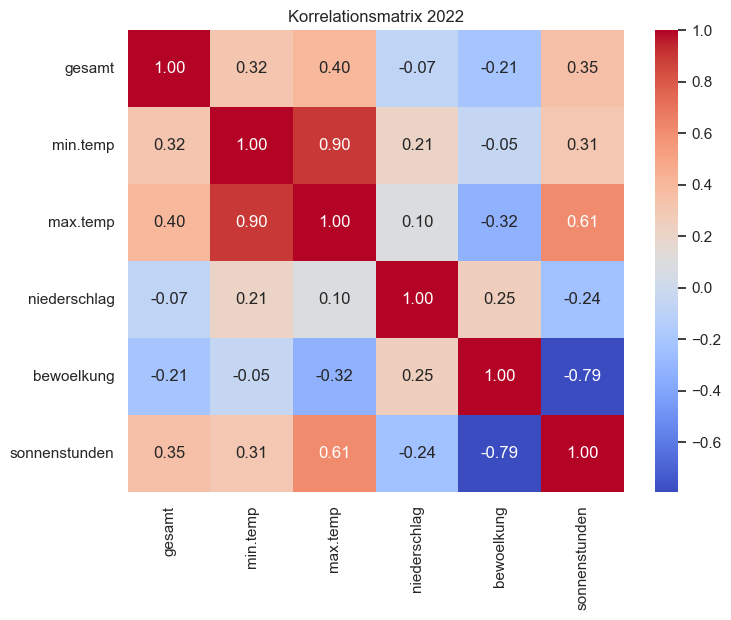

In [23]:
# Plot der Korrelationsmatrix mit Seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_scaled, annot=True, cmap="coolwarm", fmt=".2f")

# Hinzufügen des Titels
plt.title("Korrelationsmatrix 2022")

# Diagramm anzeigen
plt.show()

# Korrelation in Scatterplot visualisieren

<Axes: xlabel='max.temp', ylabel='gesamt'>

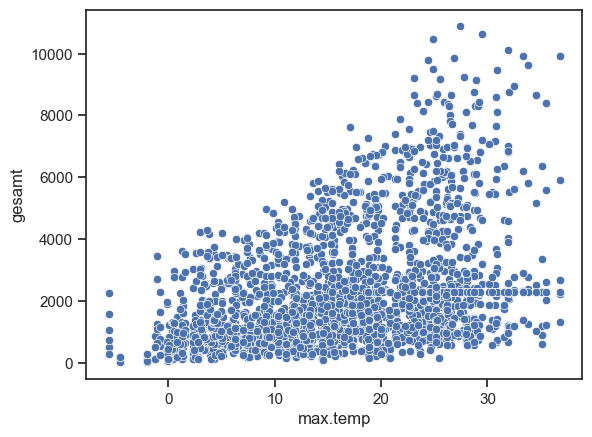

In [33]:
sns.scatterplot(data=df, x="max.temp", y="gesamt")

<Axes: xlabel='min.temp', ylabel='gesamt'>

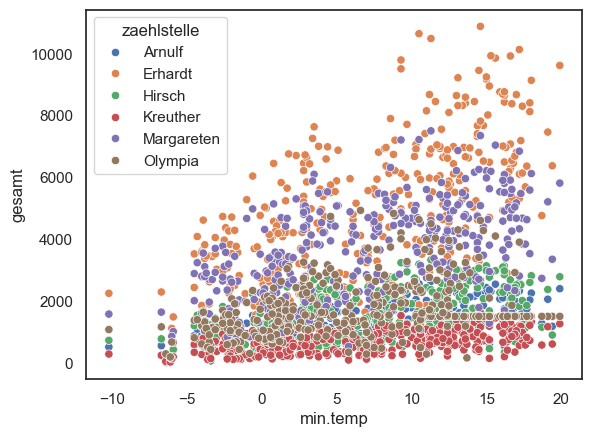

In [19]:
sns.scatterplot(data=df, x="min.temp", y="gesamt", hue="zaehlstelle")

<Axes: xlabel='niederschlag', ylabel='gesamt'>

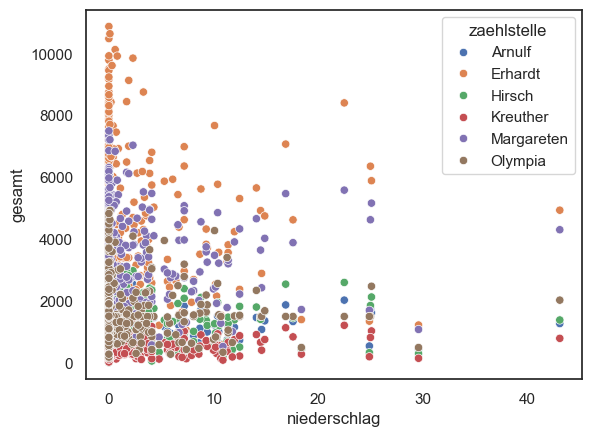

In [20]:
sns.scatterplot(data=df, x="niederschlag", y="gesamt", hue="zaehlstelle")

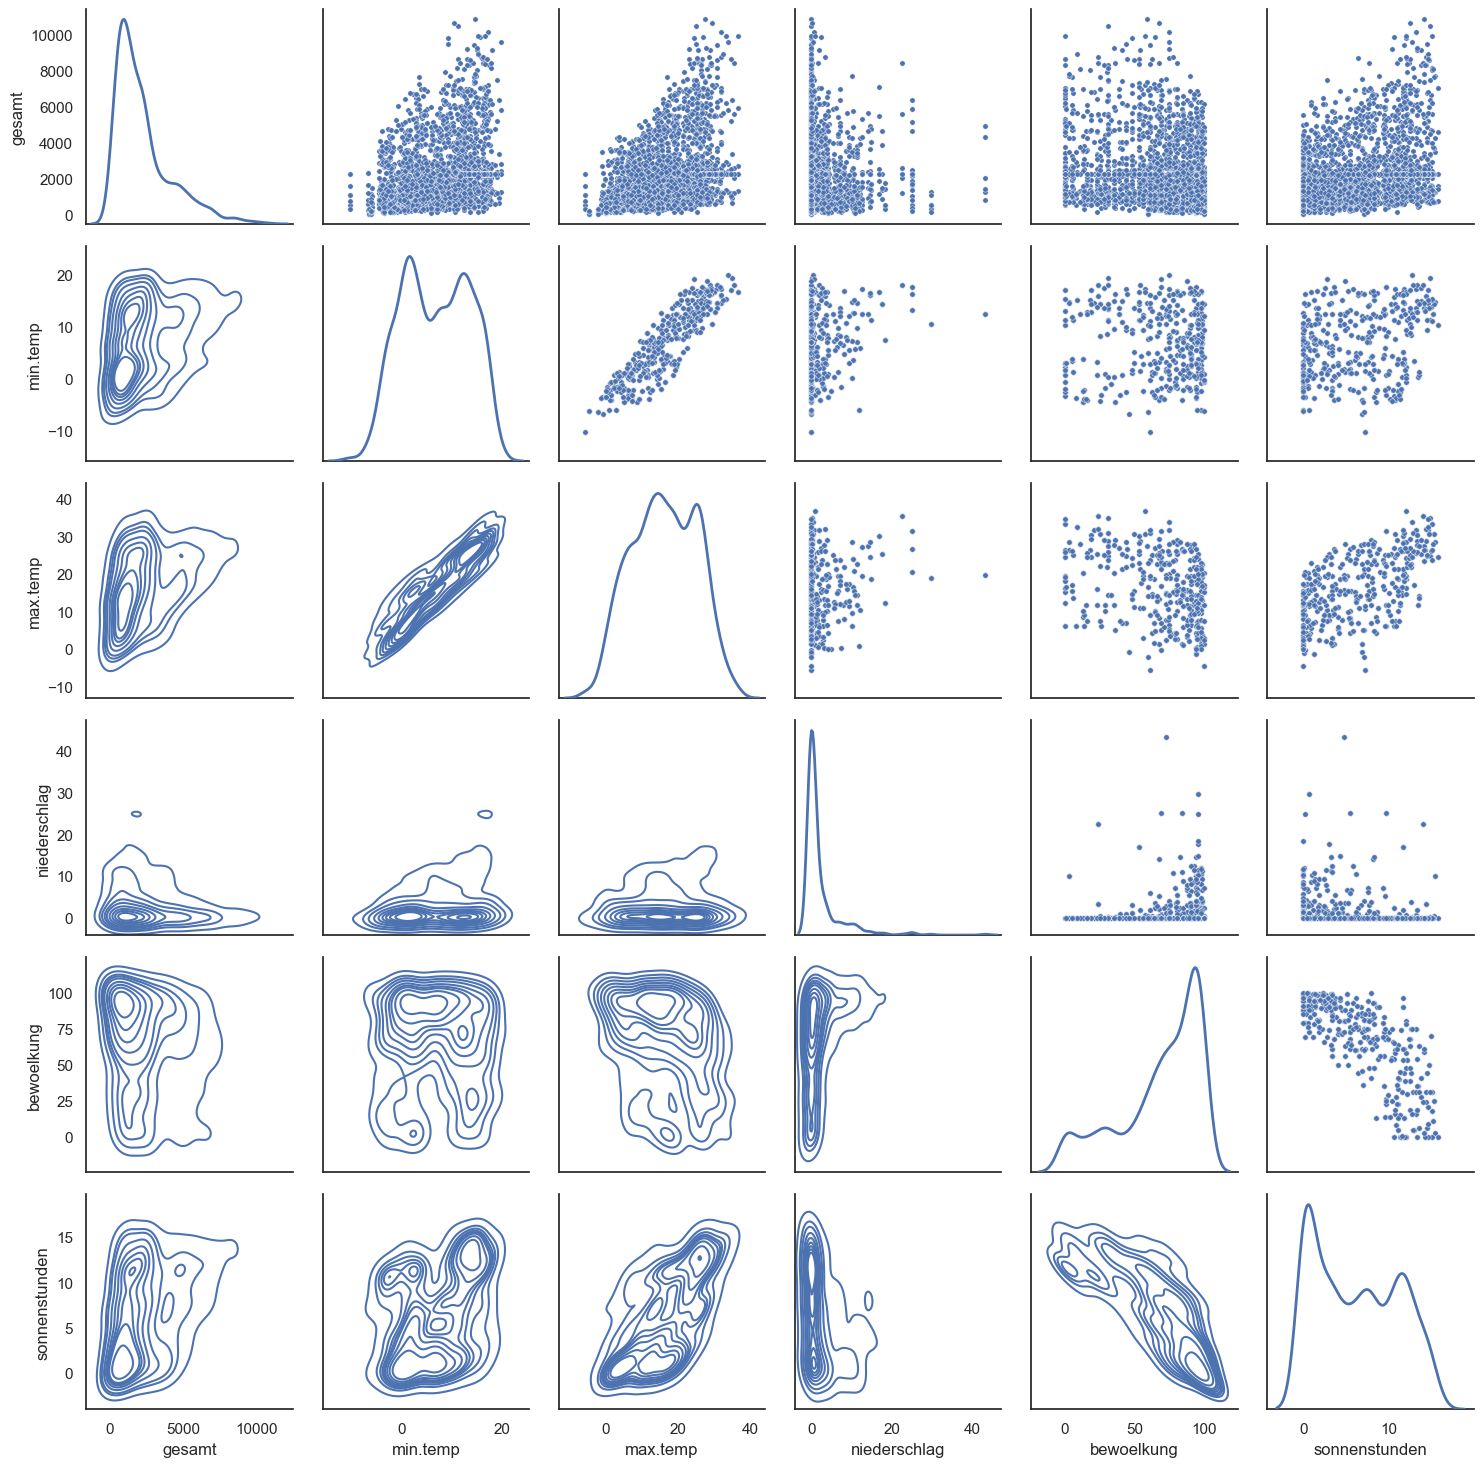

In [31]:
sns.set_theme(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

KeyError: 'zaehlstellen'

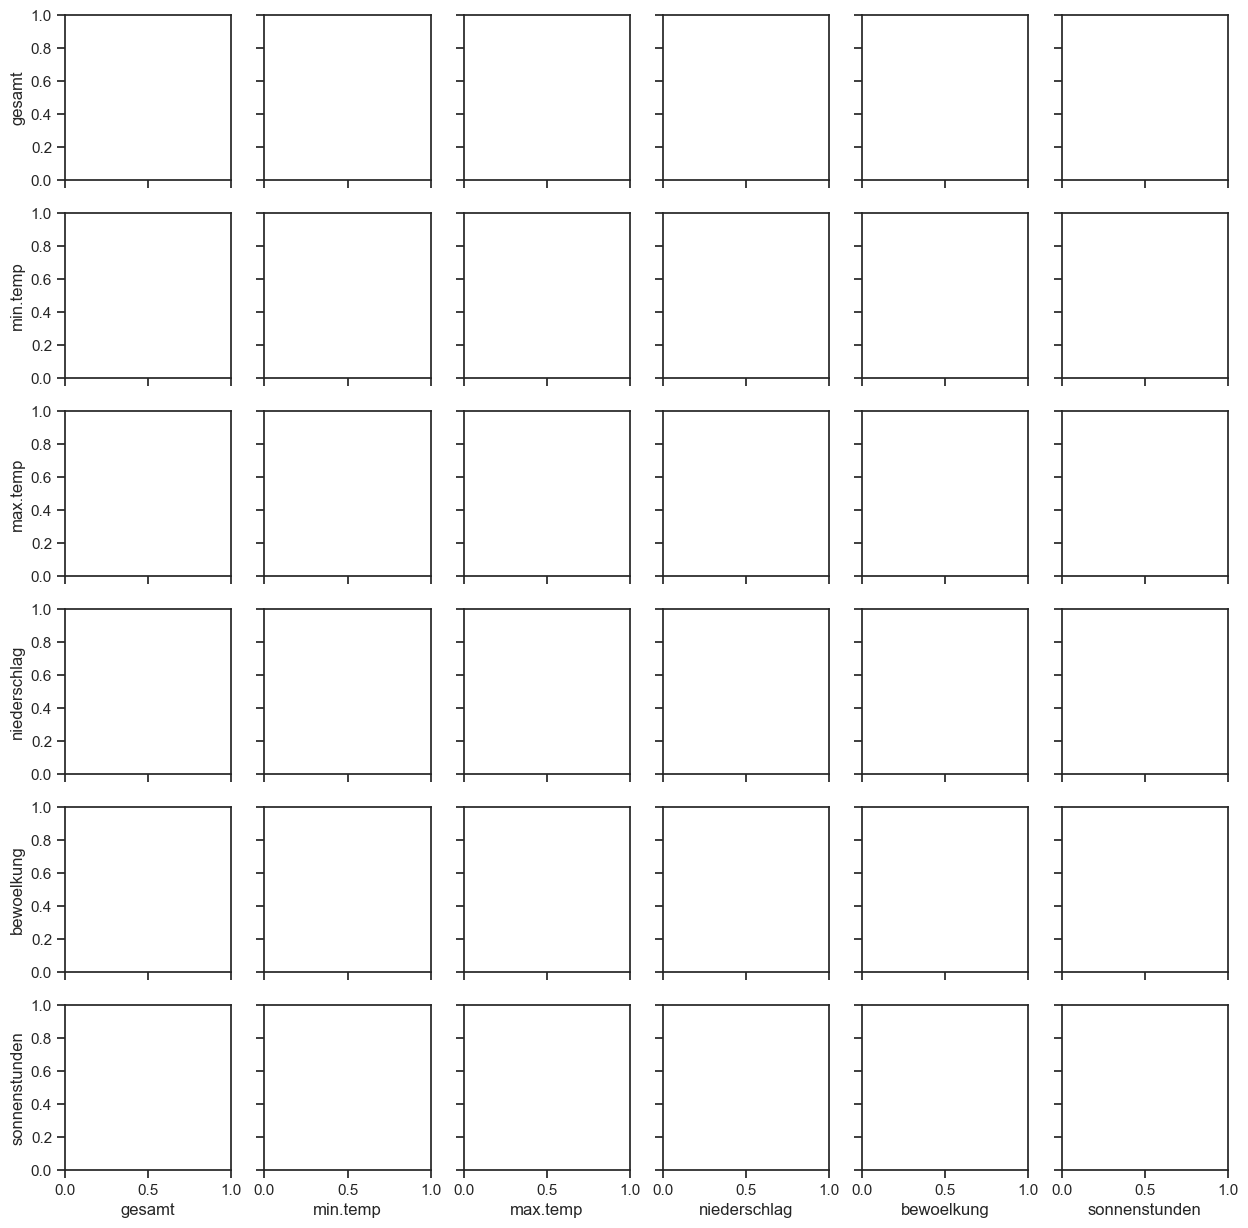

In [32]:
sns.set_theme(style="ticks")

sns.pairplot(df, hue="zaehlstellen")

# Scatterplot mit Regressionslinie

In [13]:
x=df["gesamt"]
y=df["max.temp"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [14]:
# Wie funktioniert das?
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=9.37+0.00x, r=0.50'

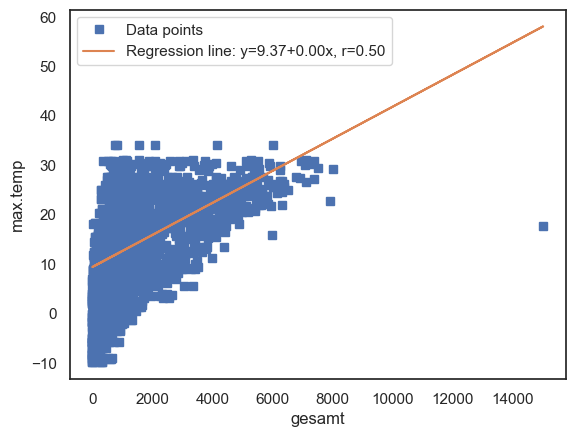

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('gesamt')
ax.set_ylabel('max.temp')
ax.legend(facecolor='white')
plt.show()